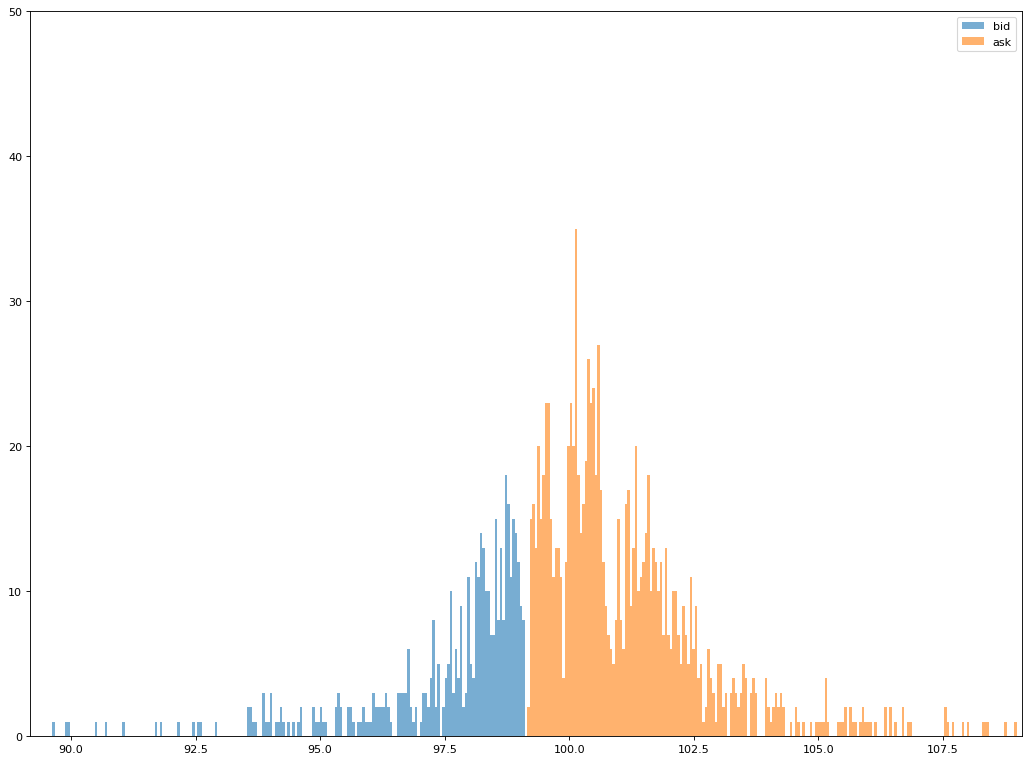

<Figure size 1120x800 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

<Figure size 1120x800 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

<Figure size 1120x800 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

<Figure size 1120x800 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

<Figure size 1120x800 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

<Figure size 1120x800 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

<Figure size 1120x800 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

<Figure size 1120x800 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

<Figure size 1120x800 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

<Figure size 1120x800 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

<Figure size 1120x800 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

<Figure size 1120x800 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

<Figure size 1120x800 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

<Figure size 1120x800 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

<Figure size 1120x800 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

<Figure size 1120x800 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

<Figure size 1120x800 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

<Figure size 1120x800 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

<Figure size 1120x800 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

<Figure size 1120x800 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

<Figure size 1120x800 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

<Figure size 1120x800 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

<Figure size 1120x800 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

<Figure size 1120x800 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

<Figure size 1120x800 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation
from matplotlib.pyplot import figure
from IPython.display import display, clear_output

import random
import math
import numpy as np

def order_book_snapshot(mid_price, gap, n_orders):
    
    x = [round(mid_price - gap/2 - np.exp(random.gauss(0,1)),2) for _ in range(n_orders)]
    y = [round(mid_price + gap/2 + np.exp(random.gauss(0,1)),2) for _ in range(n_orders)]  
    
    return x,y


def order_book_update(mid_price, gap, x,y, order_flow):
    
    xflow = [round(mid_price - gap/2 - np.exp(random.gauss(0, 1)),2) for _ in range(order_flow)]
    yflow = [round(mid_price + gap/2 + np.exp(random.gauss(0, 1)),2) for _ in range(order_flow)]   
    
    xtemp = [i for i in x if random.random() > order_flow/len(x)] + [i for i in xflow]
    ytemp = [i for i in y if random.random() > order_flow/len(y)] + [i for i in yflow]
    
    xnew = [i for i in xtemp if i < mid_price - gap/2] + [i for i in ytemp if i < mid_price - gap/2]
    ynew = [i for i in ytemp if i > mid_price + gap/2] + [i for i in xtemp if i > mid_price + gap/2]
    
    return xnew,ynew

T = 5
mu = 0.2
sigma = 0.2
S0 = 100
dt = 0.2
N = round(T/dt)
t = np.linspace(0, T, N)
W = np.random.standard_normal(size = N) 
W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
X = mu*t + sigma*W 
S = S0*(1 + 0.01*np.cos(2*math.pi*X)) ### oscillatory random motion ###

tick = 0.05
gap = 0.2
n_orders = 1000

x,y = order_book_snapshot(S[0], S[0]/n_orders, n_orders)

order_flow = 200

for i in range(len(S)):
    
    x,y = order_book_update(S[i], S[0]/1000, x, y, order_flow)

    bins = np.linspace(S[i] - np.sqrt(S[i]), S[i]  + np.sqrt(S[i]) , int( (2*np.sqrt(S[i]))/tick))
    
    figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
    fig, ax = plt.subplots(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
    
    ax.hist(x, bins, alpha=0.6, label='bid')
    ax.hist(y, bins, alpha=0.6, label='ask')
    ax.legend(loc='upper right')
    
    plt.xlim([S[i] - np.sqrt(S[i]), S[i]  + np.sqrt(S[i]) ])
    plt.ylim([0,50])
    
    clear_output(wait=True)
    display(fig)
    plt.clf()
